In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [157]:
# Seaborn 테마 설정
sns.set_theme(style='whitegrid')

# 한글 폰트 사용
font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_8448\4175997218.py:5: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요


In [66]:
df = pd.read_csv('bad_good_review.csv').drop(columns='Unnamed: 0')

def search_keyword(keyword) :
    search_df = df[df['bad_noun'] == keyword]
    return search_df

def show_data(category) :

    total_df = pd.DataFrame()
    
    for word in category :
        try :
            df = search_keyword(word)
        except :
            df = None
            print(f'{word} 해당되는 키워드가 없습니다.')
        total_df = pd.concat([total_df, df])
        
    return total_df

In [133]:
median = df['per_diff'].median()
mean = df['per_diff'].mean()
std = df['per_diff'].std()

df[df['per_diff'] == df['per_diff'].min()]

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
12,지금,14410,0.545711,13.0,지금,6462,1.095823,2.0,-0.550112,긍정


In [ ]:
df['per_diff'].quantile(0.25)
df['per_diff'].quantile(0.25)

0.0001169583035355

In [ ]:
# per_diff에 따라 음수면 '긍정우세' 양수면 '부정우세'로 판단
def good_bad_decision(word) :

    q1 = df['per_diff'].quantile(0.25)
    q3 = df['per_diff'].quantile(0.75)
    
    if word < q1 :
        return '긍정'
    elif word > q1 and word < q3 :
        return '보통'
    else :
        return '부정'
    
df['decision'] = df['per_diff'].apply(good_bad_decision)

In [159]:
# 데이터 저장
df.to_excel('total_df.xlsx')

<Axes: xlabel='decision', ylabel='count'>

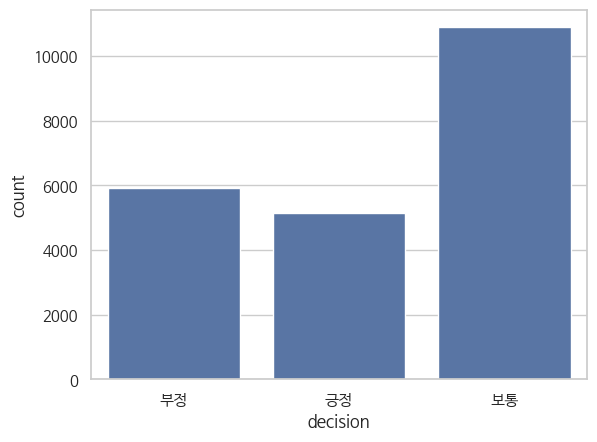

In [ ]:
# 전체 비율 확인
sns.countplot(data = df, x = df['decision'])

# 가설에 대한 키워드 검증
- 가설 1) 편의성 증가 

직관적, 단순함, 쉽게 이해, 러닝커브, 접근성, 조작감, UI, 인터페이스
튜토리얼, 가이드, 설명서, 초보자, 진입장벽, 복잡함, 혼란스러움
게임성, 조작법, 컨트롤, 간결함, 간편함, 사용성

- 가설 2: 확실하게 느낄 수 있는 성장 체감

레벨업, 성장, 능력치, 강화, 성취감, 보상, 파밍
스킬, 장비, 아이템, 스탯, 능력, 성장곡선, 진척도
던전, 퀘스트, 미션, 도전, 성취, 클리어, 난이도
캐릭터 빌드, 특화, 사냥, 성장속도, 육성

- 가설 3: 게임 연출의 강화

그래픽, 이펙트, 타격감, 효과음, 사운드, 배경음악, BGM
스킬 연출, 타격감, 시각효과, 애니메이션, 히트감
컷씬, 연출, 특수효과, 몰입감, 액션, 타격, 임팩트
화려함, 상쾌함, 쾌감, 만족감, 시원함, 박진감

- 가설 4: 과금의 대한 리워드 강화

과금, 현질, 충전, 결제, 캐시, 아이템몰, 패키지
가성비, 혜택, 보너스, 특전, 한정, 이벤트, 프리미엄
뽑기, 가챠, 확률, 레어, 유니크, 에픽, 레전더리
밸런스, 불평등, 페이투윈, 무과금, 과금유저, 월정액
코스튬, 스킨, 외형, 꾸미기, 컬렉션, VIP

In [160]:
system = '이해, 시스템, 설명, 조작, 직관, 단순, 뉴비, 유입, 시즌, 고인'
growth = '성장, 스킬, 장비, 보상, 강화, 던전'
effect = '이펙트, 연출, 컷씬, 사운드, 애니메이션, 그래픽'
pay = '패키지, 현질, 과금, 충전, 뽑기, 결제'

system = [word.strip() for word in system.split(',')]
growth = [word.strip() for word in growth.split(',')]
effect = [word.strip() for word in effect.split(',')]
pay = [word.strip() for word in pay.split(',')]

In [185]:
search_keyword('스펙')

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
60,스펙,5099,0.193101,61.0,스펙,2129,0.361035,30.0,-0.167934,긍정


In [148]:
show_data(system)

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
221,이해,1918,0.072635,222.0,이해,263,0.044599,389.5,0.028036,부정
346,시스템,1384,0.052412,347.0,시스템,264,0.044769,386.0,0.007644,부정
493,설명,1003,0.037984,494.5,설명,181,0.030694,602.5,0.007290,부정
717,조작,644,0.024388,718.5,조작,92,0.015601,1038.0,0.008787,부정
1961,직관,174,0.006589,1961.5,직관,50,0.008479,1656.5,-0.001890,긍정
1983,단순,171,0.006476,1982.0,단순,29,0.004918,2419.0,0.001558,부정
49,뉴비,6736,0.255094,50.0,뉴비,1568,0.265901,47.0,-0.010806,긍정
168,유입,2525,0.095622,169.0,유입,726,0.123115,118.0,-0.027492,긍정
37,시즌,8080,0.305992,38.0,시즌,4427,0.750728,7.0,-0.444736,긍정
4851,고인,43,0.001628,4835.0,고인,19,0.003222,3247.5,-0.001594,긍정


In [149]:
show_data(growth)

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
201,성장,2075,0.078581,202.0,성장,831,0.140921,104.0,-0.062340,긍정
10,스킬,15633,0.592026,11.0,스킬,1688,0.286250,40.0,0.305776,부정
41,장비,7471,0.282929,42.0,장비,1172,0.198747,66.0,0.084182,부정
70,보상,4632,0.175415,71.0,보상,829,0.140581,105.0,0.034834,부정
116,강화,3335,0.126297,117.0,강화,700,0.118706,122.5,0.007592,부정
64,던전,4871,0.184466,65.0,던전,996,0.168901,80.0,0.015565,부정


In [150]:
show_data(effect)

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
789,이펙트,579,0.021927,790.0,이펙트,151,0.025607,709.5,-0.003680,긍정
1349,연출,296,0.011210,1350.5,연출,67,0.011362,1334.0,-0.000152,보통
2642,컷씬,111,0.004204,2649.0,컷씬,38,0.006444,2003.5,-0.002240,긍정
3529,사운드,71,0.002689,3519.5,사운드,47,0.007970,1725.0,-0.005281,긍정
4287,애니메이션,53,0.002007,4282.0,애니메이션,11,0.001865,4616.0,0.000142,부정
4581,그래픽,47,0.001780,4575.0,그래픽,11,0.001865,4616.0,-0.000085,보통


In [151]:
show_data(pay)

,bad_noun,count_x,bad_per(%),bad_rank,good_noun,count_y,good_per(%),good_rank,per_diff,decision
141,패키지,2904,0.109975,142.0,패키지,632,0.107174,143.0,0.002801,부정
438,현질,1095,0.041468,438.5,현질,230,0.039003,459.0,0.002465,부정
573,과금,854,0.032341,574.5,과금,206,0.034933,522.5,-0.002592,긍정
576,충전,843,0.031925,577.0,충전,90,0.015262,1055.5,0.016663,부정
1654,뽑기,224,0.008483,1654.0,뽑기,49,0.008309,1679.5,0.000174,부정
2060,결제,160,0.006059,2059.5,결제,14,0.002374,3966.0,0.003685,부정
